In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.trend import PolynomialTrendForecaster,PiecewiseLinearTrendForecaster
from sktime.transformations.series.detrend  import Deseasonalizer,Detrender
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

from sktime.forecasting.fbprophet           import Prophet

11:17:23 - cmdstanpy - INFO - Chain [1] start processing
11:17:23 - cmdstanpy - INFO - Chain [1] done processing
11:17:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:23 - cmdstanpy - INFO - Chain [1] start processing
11:17:23 - cmdstanpy - INFO - Chain [1] done processing
11:17:24 - cmdstanpy - INFO - Chain [1] start processing
11:17:24 - cmdstanpy - INFO - Chain [1] done processing
11:17:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:24 - cmdstanpy - INFO - Chain [1] start processing
11:17:24 - cmdstanpy - INFO - Chain [1] done processing


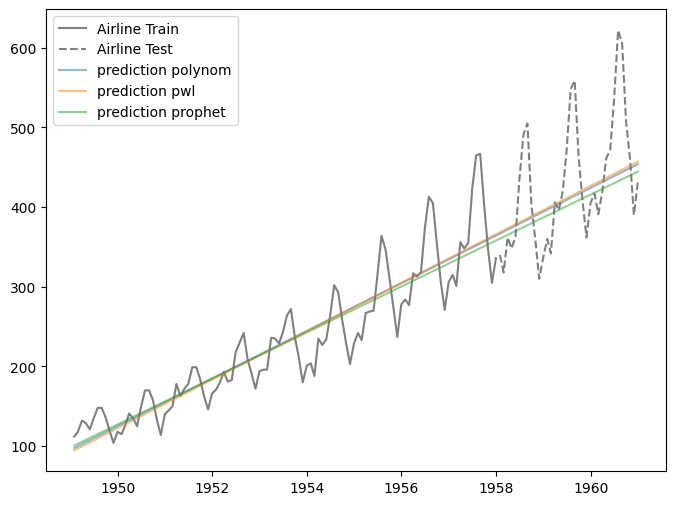

In [44]:
y =load_airline().to_timestamp(freq='M')
y_train, y_test = temporal_train_test_split(y)


changepoint_prior_scale = 0.001

fh = ForecastingHorizon(y.index, is_relative=False)

prophet = Prophet(
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    changepoint_prior_scale=changepoint_prior_scale
)
pwl =  PiecewiseLinearTrendForecaster(changepoint_prior_scale=changepoint_prior_scale)
poly = PolynomialTrendForecaster(degree=1)

np.random.seed(1000)

y_pred_pwl  = pwl.fit(y_train).predict(fh)
y_pred_poly = poly.fit(y_train).predict(fh)
y_pred_prophet  = prophet.fit(y_train).predict(fh)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(y_train, color='grey', label="Airline Train")
plt.plot(y_test, color='grey', linestyle="--", label="Airline Test")
plt.plot(y_pred_poly,label="prediction polynom", alpha=0.5)
plt.plot(y_pred_pwl,label="prediction pwl", alpha=0.5)
plt.plot(y_pred_prophet,label="prediction prophet", alpha=0.5)

plt.legend()
plt.show()